In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
from pathlib import Path
import glob
import itertools
import matplotlib.animation as ani
import os

**Convert temperature in GK to MeV:**
        <br> $$1 J = 7.242971666663x10^{22} K $$
        <br> $$1 J = 6241506363094    MeV $$
        <br> $$1 K = 8.61732814974493x10^{-11} MeV$$

In [35]:
def GK_to_MeV(k):
    kelvin = k*(10**9)
    MeV = kelvin*8.61732814974493e-11
    return MeV

def kg_to_MeV(k):
    MeV = k*5.6095861672249e29
    return MeV

In [36]:
#print(os.getcwd())
#print(os.listdir())
#filepath = 'alterbbn_v2.2'
#os.chdir(filepath)
#%run trial_hello.ipynb

In [37]:
# enter your file directory for alterbbn_v2.2 
run_directory = 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x'

In [38]:
eta_values = [1e-10, 3e-10, 6.1e-10] #enter whatever eta values you want to go through here 

c=0
a = []
dict = ['Time(s)', 'a', 'T(MeV)', 'Tnu (GK)', 'Photons', 'Baryons', 'Neutrinos', 'Phi (GeV^4)', 'Y(n)', 'Y(p)', 'Y(2H)', 'Y(4He)', 'Y(7Li)', 'Y(Be7)', 'eta']

#print(os.getcwd())

for i in eta_values:
    print(i)
    d = subprocess.run([run_directory, str(i)], capture_output = True, text = True, shell = True)
    print(d.stderr)
    
    check_file = Path("evolution.out")
 
    if check_file.is_file():
        print('there is a file!')
        text = open('evolution.out', "r").readlines()

        df = pd.DataFrame(columns = dict)

        for i in range(1, len(text)):
            a = text[i]
            b = a.split(',')
            df.loc[i] = b

        df = df.replace({'\n':''},regex=True)
        df = df.apply(pd.to_numeric)
        df['T(MeV)'] = df['T(MeV)'].apply(lambda x: GK_to_MeV(x))

        if c == 0:
            temperature_str_low = df['T(MeV)'].to_numpy()
            Y_n_str_low = df['Y(n)'].to_numpy()
            Y_p_str_low = df['Y(p)'].to_numpy()
            Y_2H_str_low = df['Y(2H)'].to_numpy()
            Y_4He_str_low = df['Y(4He)'].to_numpy()
            Y_7Li_str_low = df['Y(7Li)'].to_numpy()
            Y_Be7_str_low = df['Y(Be7)'].to_numpy()
            #print('made to low')

        if c == 1:
            temperature_str_med = df['T(MeV)'].to_numpy()
            Y_n_str_med = df['Y(n)'].to_numpy()
            Y_p_str_med = df['Y(p)'].to_numpy()
            Y_2H_str_med = df['Y(2H)'].to_numpy()
            Y_4He_str_med = df['Y(4He)'].to_numpy()
            Y_7Li_str_med = df['Y(7Li)'].to_numpy()
            Y_Be7_str_med = df['Y(Be7)'].to_numpy()
            #print('made to med')

        if c == 2:
            temperature_str_high = df['T(MeV)'].to_numpy()
            Y_n_str_high = df['Y(n)'].to_numpy()
            Y_p_str_high = df['Y(p)'].to_numpy()
            Y_2H_str_high = df['Y(2H)'].to_numpy()
            Y_4He_str_high = df['Y(4He)'].to_numpy()
            Y_7Li_str_high = df['Y(7Li)'].to_numpy()
            Y_Be7_str_high = df['Y(Be7)'].to_numpy()
            #print('made to high')
#        '''
        
        c+=1
        
    else:
        print('output file was not created')

    
#print(df)

1e-10

there is a file!
3e-10

there is a file!
6.1e-10

there is a file!


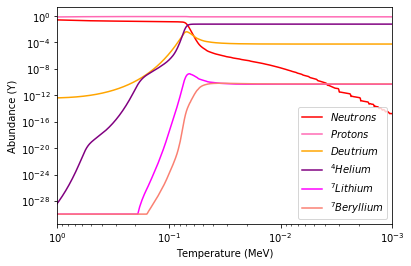

In [39]:
plt.figure()
plt.loglog(temperature_str_med, Y_n_str_med, color = 'red', label = '$Neutrons$')
plt.loglog(temperature_str_med, Y_p_str_med, color = 'hotpink', label = '$Protons$')
plt.loglog(temperature_str_med, Y_2H_str_med, color  = 'orange', label = '$Deutrium$')
plt.loglog(temperature_str_med, Y_4He_str_med, color = 'purple', label = '${}^4 Helium$')
plt.loglog(temperature_str_med, Y_7Li_str_med, color = 'magenta', label = '${}^7 Lithium$')
plt.loglog(temperature_str_med, Y_Be7_str_med, color = 'salmon', label = '${}^7 Beryllium$')
plt.xlim(10e-1, 10e-4)
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance (Y)')
plt.legend()
plt.show()


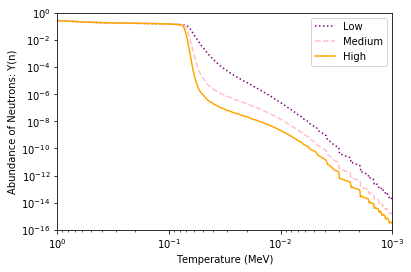

In [40]:
plt.figure()
plt.loglog(temperature_str_low, Y_n_str_low, color = 'purple', linestyle  = ':', label = 'Low')
plt.loglog(temperature_str_med, Y_n_str_med, color = 'pink', linestyle  = '--', label = 'Medium')
plt.loglog(temperature_str_high, Y_n_str_high, color  = 'orange', label = 'High')
plt.xlim(10e-1, 10e-4)
plt.ylim(10**-16, 10**0)
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance of Neutrons: Y(n)')
plt.legend()
plt.show()


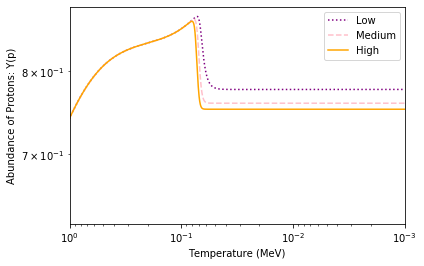

In [41]:
plt.figure()
plt.loglog(temperature_str_low, Y_p_str_low, color = 'purple', linestyle  = ':', label = 'Low')
plt.loglog(temperature_str_med, Y_p_str_med, color = 'pink', linestyle  = '--', label = 'Medium')
plt.loglog(temperature_str_high, Y_p_str_high, color  = 'orange', label = 'High')
plt.xlim(10e-1, 10e-4)
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance of Protons: Y(p)')
plt.legend()
plt.show()

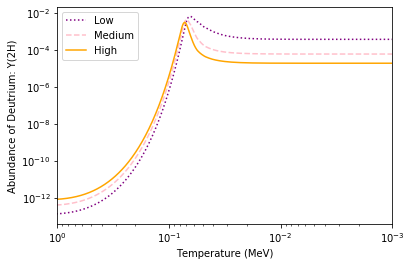

In [42]:
plt.figure()
plt.loglog(temperature_str_low, Y_2H_str_low, color = 'purple', linestyle  = ':', label = 'Low')
plt.loglog(temperature_str_med, Y_2H_str_med, color = 'pink', linestyle  = '--', label = 'Medium')
plt.loglog(temperature_str_high, Y_2H_str_high, color  = 'orange', label = 'High')
plt.xlim(10e-1, 10e-4)
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance of Deutrium: Y(2H)')
plt.legend()
plt.show()

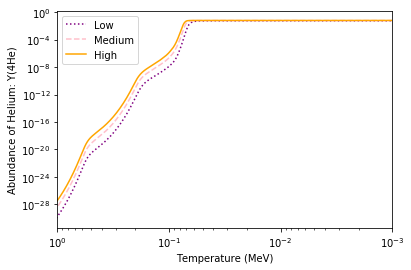

In [43]:
plt.figure()
plt.loglog(temperature_str_low, Y_4He_str_low, color = 'purple', linestyle  = ':', label = 'Low')
plt.loglog(temperature_str_med, Y_4He_str_med, color = 'pink', linestyle  = '--', label = 'Medium')
plt.loglog(temperature_str_high, Y_4He_str_high, color  = 'orange', label = 'High')
plt.xlim(10e-1, 10e-4)
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance of Helium: Y(4He)')
plt.legend()
plt.show()

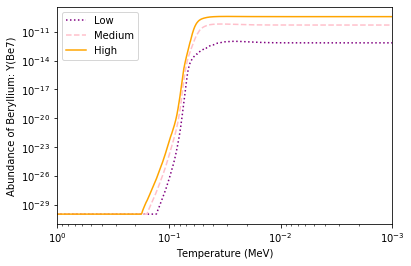

In [44]:
plt.figure()
plt.loglog(temperature_str_low, Y_Be7_str_low, color = 'purple', linestyle  = ':', label = 'Low')
plt.loglog(temperature_str_med, Y_Be7_str_med, color = 'pink', linestyle  = '--', label = 'Medium')
plt.loglog(temperature_str_high, Y_Be7_str_high, color  = 'orange', label = 'High')
plt.xlim(10e-1, 10e-4)
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance of Beryllium: Y(Be7)')
plt.legend()
plt.show()

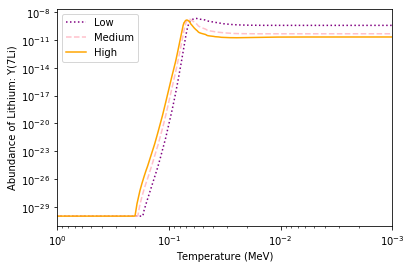

In [45]:
plt.figure()
plt.loglog(temperature_str_low, Y_7Li_str_low, color = 'purple', linestyle  = ':', label = 'Low')
plt.loglog(temperature_str_med, Y_7Li_str_med, color = 'pink', linestyle  = '--', label = 'Medium')
plt.loglog(temperature_str_high, Y_7Li_str_high, color  = 'orange', label = 'High')
plt.xlim(10e-1, 10e-4)
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance of Lithium: Y(7Li)')
plt.legend()
plt.show()


### Comparing results with equilibrium:

Because equilibrium is happening around 1 MeV, $\frac{g_s(T)}{g_s(T_0)}$ ratio is not 1, and the actual value comes from:
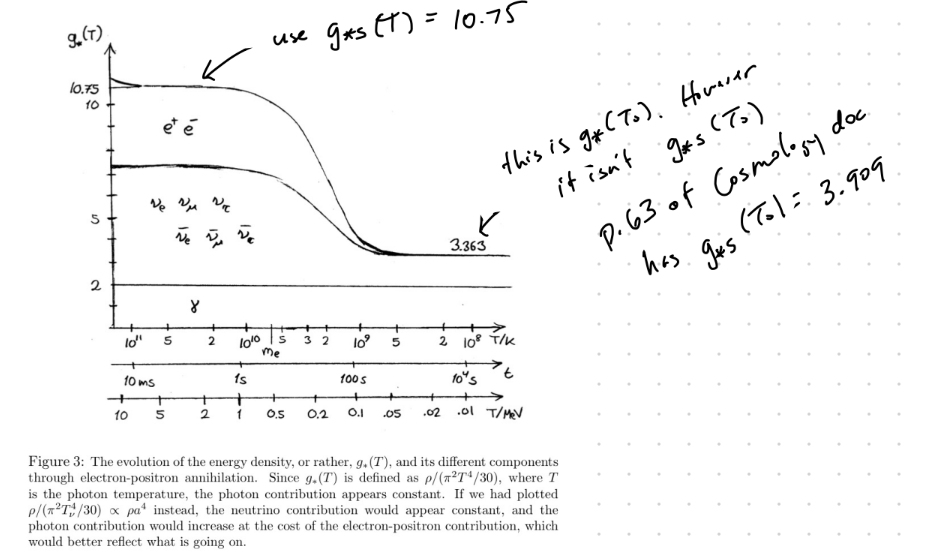

In [46]:
#you should get 4 times the number of eta values (so currently 4*3 = 12) outputs from this function. It returns the 
#thermodynamic equilibrium states of each element based on the temperature and eta values given.

def thermodynamic_equilibrium_calc(T, eta, Y_p, Y_n):    
    #for N and P
    mass_diff_n_p = 1.293
    n_p = np.e**(-mass_diff_n_p/T)
    X_n = n_p/(n_p+1)
    X_p = 1/(n_p+1)

    #for 2H, 4He, 7Li, 7Be:
    A = [2, 4, 7, 7]
    Z = [1, 2, 3, 4]
    B = [2.22, 28.3, 39.25, 37.6]
    g = [3, 1, 4, 4]
    m_N = kg_to_MeV(1.67e-27)
    zeta_3 = 1.20206 
    gs_T_T0_ratio = 10.75/3.909
    
    # Create blank array for thermodynamic equilibrium values based on temp and eta values
    X = np.zeros(len(A))

    #eta is a list of 3, there are 3 temperature strings that correlate with these eta values
    for i in range(len(Z)):
        epsolin = (1/(np.pi**2))*zeta_3*((2*np.pi*T/m_N)**(3/2))*eta*gs_T_T0_ratio
        pt1 = 0.5
        pt2 = Y_p**Z[i]
        pt3 = Y_n**(A[i]-Z[i])
        pt4 = g[i]
        pt5 = A[i]**(5/2)
        pt6 = epsolin**(A[i]-1)
        pt7 = np.e**(B[i]/T)
        X[i] = pt1*pt2*pt3*pt4*pt5*pt6*pt7
        
    X_2H = X[0]
    X_4He = X[1]
    X_7Li = X[2]
    X_7Be = X[3]
    
    return X_n, X_p, X_2H, X_4He, X_7Li, X_7Be

## Calculate thermodynamic equilibrium states for high eta values

$ X_i $ is a mass abundance. $ Y_p $ is also a mass abundance, so they should match in equilibrium. However, Deuterium plots are 2H/H, number abundances. In order to be able to compare the deuterium data from BBN to equilibrium we have to take this into account. Lithium and Berilium are also affected by this but their BBN output isn't close to their equilibrium point so we aren't focusing on them.

In [47]:
# take account for the factor of 2 hydrogen and convert to number abundance in the form of 2H/H which Y_p provides the
# number abundance for protons (H) and 1/2 x_2H provides number abundance of 2H

x_n_eq_h = np.zeros(len(temperature_str_high))
x_p_eq_h = np.zeros(len(temperature_str_high))
x_2H_eq_h = np.zeros(len(temperature_str_high))
x_4He_eq_h = np.zeros(len(temperature_str_high))
x_7Li_eq_h = np.zeros(len(temperature_str_high))
x_7Be_eq_h = np.zeros(len(temperature_str_high))

a = 0

for g, w, m in zip(temperature_str_high, Y_p_str_high, Y_n_str_high):
    x_n_eq_h[a] = thermodynamic_equilibrium_calc(g, eta_values[2], w, m)[0]
    x_p_eq_h[a] = thermodynamic_equilibrium_calc(g, eta_values[2], w, m)[1]
    x_2H_eq_h[a] = 0.5*(thermodynamic_equilibrium_calc(g, eta_values[2], w, m)[2])/w
    x_4He_eq_h[a] = thermodynamic_equilibrium_calc(g, eta_values[2], w, m)[3]
    x_7Li_eq_h[a] = thermodynamic_equilibrium_calc(g, eta_values[2], w, m)[4]
    x_7Be_eq_h[a] = thermodynamic_equilibrium_calc(g, eta_values[2], w, m)[5]
    a += 1
    
print(a)    

# ratio = observed/thermodynamic equilibrium
ratio_n_high = Y_n_str_high/x_n_eq_h
#print(ratio_n_high)
ratio_p_high = Y_p_str_high/x_p_eq_h
#print(ratio_p_high)
ratio_2H_high = Y_2H_str_high/x_2H_eq_h
#print(ratio_2H_high)
ratio_4He_high = Y_4He_str_high/x_4He_eq_h
ratio_7Li_high = Y_7Li_str_high/x_7Li_eq_h
ratio_Be7_high = Y_Be7_str_high/x_7Be_eq_h

947


C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in true_divide


## For medium eta values

In [48]:
x_n_eq_m = np.zeros(len(temperature_str_med))
x_p_eq_m = np.zeros(len(temperature_str_med))
x_2H_eq_m = np.zeros(len(temperature_str_med))
x_4He_eq_m = np.zeros(len(temperature_str_med))
x_7Li_eq_m = np.zeros(len(temperature_str_med))
x_7Be_eq_m = np.zeros(len(temperature_str_med))

a = 0

for g, w, m in zip(temperature_str_med, Y_p_str_med, Y_n_str_med):
    x_n_eq_m[a] = thermodynamic_equilibrium_calc(g, eta_values[1], w, m)[0]
    x_p_eq_m[a] = thermodynamic_equilibrium_calc(g, eta_values[1], w, m)[1]
    x_2H_eq_m[a] = 0.5*(thermodynamic_equilibrium_calc(g, eta_values[1], w, m)[2])/w
    x_4He_eq_m[a] = thermodynamic_equilibrium_calc(g, eta_values[1], w, m)[3]
    x_7Li_eq_m[a] = thermodynamic_equilibrium_calc(g, eta_values[1], w, m)[4]
    x_7Be_eq_m[a] = thermodynamic_equilibrium_calc(g, eta_values[1], w, m)[5]
    a += 1
    

ratio_n_med = Y_n_str_med/x_n_eq_m
ratio_p_med = Y_p_str_med/x_p_eq_m
ratio_2H_med = Y_2H_str_med/x_2H_eq_m
ratio_4He_med = Y_4He_str_med/x_4He_eq_m
ratio_7Li_med = Y_7Li_str_med/x_7Li_eq_m
ratio_Be7_med = Y_Be7_str_med/x_7Be_eq_m

C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in true_divide


## For low eta values

In [49]:
x_n_eq_L = np.zeros(len(temperature_str_low))
x_p_eq_L = np.zeros(len(temperature_str_low))
x_2H_eq_L = np.zeros(len(temperature_str_low))
x_4He_eq_L = np.zeros(len(temperature_str_low))
x_7Li_eq_L = np.zeros(len(temperature_str_low))
x_7Be_eq_L = np.zeros(len(temperature_str_low))

a = 0

for g, w, m in zip(temperature_str_low, Y_p_str_low, Y_n_str_low):
    x_n_eq_L[a] = thermodynamic_equilibrium_calc(g, eta_values[0], w, m)[0]
    x_p_eq_L[a] = thermodynamic_equilibrium_calc(g, eta_values[0], w, m)[1]
    x_2H_eq_L[a] = 0.5*(thermodynamic_equilibrium_calc(g, eta_values[0], w, m)[2])/w
    x_4He_eq_L[a] = thermodynamic_equilibrium_calc(g, eta_values[0], w, m)[3]
    x_7Li_eq_L[a] = thermodynamic_equilibrium_calc(g, eta_values[0], w, m)[4]
    x_7Be_eq_L[a] = thermodynamic_equilibrium_calc(g, eta_values[0], w, m)[5]
    a += 1
    
print(a) 

ratio_n_low = Y_n_str_low/x_n_eq_L
ratio_p_low = Y_p_str_low/x_p_eq_L
ratio_2H_low = Y_2H_str_low/x_2H_eq_L
ratio_4He_low = Y_4He_str_low/x_4He_eq_L
ratio_7Li_low = Y_7Li_str_low/x_7Li_eq_L
ratio_Be7_low = Y_Be7_str_low/x_7Be_eq_L

933


C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in true_divide


## Plots of thermodynamic equilibrium vs outputs from varying eta values

When looking at these graphs keep in mind that they're a reflection of the temperatuer over time, the universe started out hot and cooled down, therefor the hotter temperatures are found at the beginning of the x-axis.

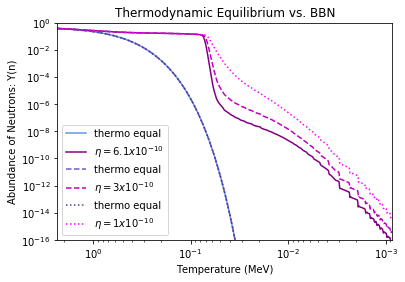

In [50]:
plt.figure()
plt.loglog(temperature_str_high, x_n_eq_h, color = 'cornflowerblue', label = 'thermo equal')
plt.loglog(temperature_str_high, Y_n_str_high, color = 'purple',label = '$\eta = 6.1x10^{-10}$')
plt.loglog(temperature_str_med, x_n_eq_m, color = 'slateblue',  linestyle = '--', label = 'thermo equal')
plt.loglog(temperature_str_med, Y_n_str_med, color = 'm', linestyle = '--', label = '$\eta = 3x10^{-10}$')
plt.loglog(temperature_str_low, x_n_eq_L, color = 'darkslateblue', linestyle = ':', label = 'thermo equal')
plt.loglog(temperature_str_low, Y_n_str_low, color = 'magenta', linestyle = ':', label = '$\eta = 1x10^{-10}$')
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance of Neutrons: Y(n)')
plt.title('Thermodynamic Equilibrium vs. BBN')
plt.ylim(10**-16, 10**0)
#plt.xlim(10e-1, 10e-4)
plt.xlim(max(temperature_str_med), min(temperature_str_med)) # universe starts hot and cools down
plt.legend()
plt.show()

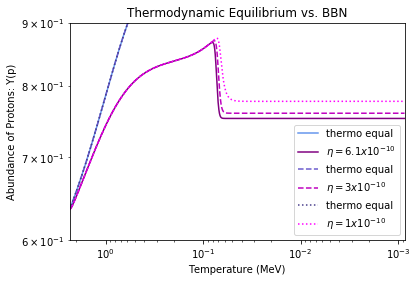

In [51]:
plt.figure()
plt.loglog(temperature_str_high, x_p_eq_h, color = 'cornflowerblue', label = 'thermo equal')
plt.loglog(temperature_str_high, Y_p_str_high, color = 'purple',label = '$\eta = 6.1x10^{-10}$')
plt.loglog(temperature_str_med, x_p_eq_m, color = 'slateblue',  linestyle = '--', label = 'thermo equal')
plt.loglog(temperature_str_med, Y_p_str_med, color = 'm', linestyle = '--', label = '$\eta = 3x10^{-10}$')
plt.loglog(temperature_str_low, x_p_eq_L, color = 'darkslateblue', linestyle = ':', label = 'thermo equal')
plt.loglog(temperature_str_low, Y_p_str_low, color = 'magenta', linestyle = ':', label = '$\eta = 1x10^{-10}$')
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance of Protons: Y(p)')
plt.title('Thermodynamic Equilibrium vs. BBN')
plt.ylim(6*(10**-1), 9*(10**-1))
plt.xlim(max(temperature_str_med), min(temperature_str_med))
plt.legend(loc=0)
plt.show()

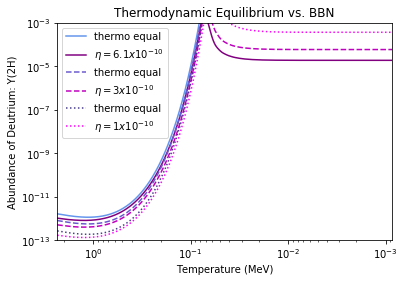

In [52]:
plt.figure()
plt.loglog(temperature_str_high, x_2H_eq_h, color = 'cornflowerblue', label = 'thermo equal')
plt.loglog(temperature_str_high, Y_2H_str_high, color = 'purple',label = '$\eta = 6.1x10^{-10}$')
plt.loglog(temperature_str_med, x_2H_eq_m, color = 'slateblue',  linestyle = '--', label = 'thermo equal')
plt.loglog(temperature_str_med, Y_2H_str_med, color = 'm', linestyle = '--', label = '$\eta = 3x10^{-10}$')
plt.loglog(temperature_str_low, x_2H_eq_L, color = 'darkslateblue', linestyle = ':', label = 'thermo equal')
plt.loglog(temperature_str_low, Y_2H_str_low, color = 'magenta', linestyle = ':', label = '$\eta = 1x10^{-10}$')
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance of Deutrium: Y(2H)')
plt.title('Thermodynamic Equilibrium vs. BBN')
plt.ylim(10**-13, 10**-3)
plt.xlim(max(temperature_str_med), min(temperature_str_med))
plt.legend(loc=0)
plt.show()

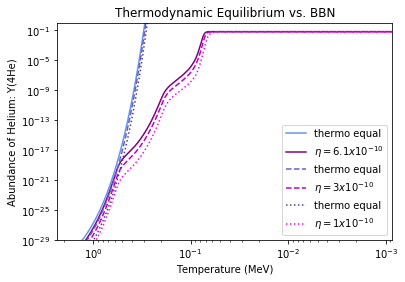

In [53]:
plt.figure()
plt.loglog(temperature_str_high, x_4He_eq_h, color = 'cornflowerblue', label = 'thermo equal')
plt.loglog(temperature_str_high, Y_4He_str_high, color = 'purple',label = '$\eta = 6.1x10^{-10}$')
plt.loglog(temperature_str_med, x_4He_eq_m, color = 'slateblue',  linestyle = '--', label = 'thermo equal')
plt.loglog(temperature_str_med, Y_4He_str_med, color = 'm', linestyle = '--', label = '$\eta = 3x10^{-10}$')
plt.loglog(temperature_str_low, x_4He_eq_L, color = 'darkslateblue', linestyle = ':', label = 'thermo equal')
plt.loglog(temperature_str_low, Y_4He_str_low, color = 'magenta', linestyle = ':', label = '$\eta = 1x10^{-10}$')
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance of Helium: Y(4He)')
plt.title('Thermodynamic Equilibrium vs. BBN')
plt.ylim(10**-29, 10**0)
plt.xlim(max(temperature_str_med), min(temperature_str_med))
plt.legend()
plt.show()

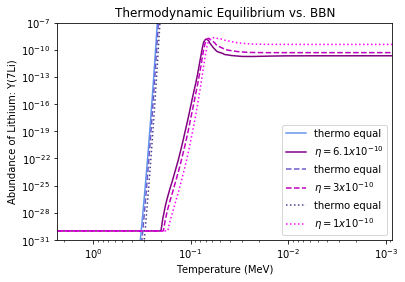

In [54]:
plt.figure()
plt.loglog(temperature_str_high, x_7Li_eq_h, color = 'cornflowerblue', label = 'thermo equal')
plt.loglog(temperature_str_high, Y_7Li_str_high, color = 'purple',label = '$\eta = 6.1x10^{-10}$')
plt.loglog(temperature_str_med, x_7Li_eq_m, color = 'slateblue', linestyle = '--', label = 'thermo equal')
plt.loglog(temperature_str_med, Y_7Li_str_med, color = 'm', linestyle = '--', label = '$\eta = 3x10^{-10}$')
plt.loglog(temperature_str_low, x_7Li_eq_L, color = 'darkslateblue', linestyle = ':', label = 'thermo equal')
plt.loglog(temperature_str_low, Y_7Li_str_low, color = 'magenta', linestyle = ':', label = '$\eta = 1x10^{-10}$')
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance of Lithium: Y(7Li)')
plt.title('Thermodynamic Equilibrium vs. BBN')
plt.ylim(10**-31, 10**-7)
plt.xlim(max(temperature_str_med), min(temperature_str_med))
plt.legend()
plt.show()

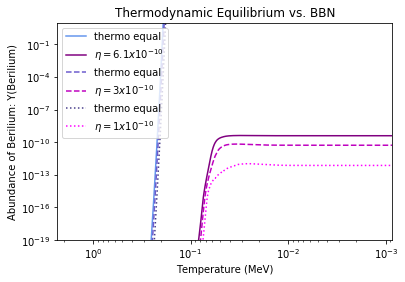

In [55]:
plt.figure()
plt.loglog(temperature_str_high, x_7Be_eq_h, color = 'cornflowerblue', label = 'thermo equal')
plt.loglog(temperature_str_high, Y_Be7_str_high, color = 'purple',label = '$\eta = 6.1x10^{-10}$')
plt.loglog(temperature_str_med, x_7Be_eq_m, color = 'slateblue',  linestyle = '--', label = 'thermo equal')
plt.loglog(temperature_str_med, Y_Be7_str_med, color = 'm', linestyle = '--', label = '$\eta = 3x10^{-10}$')
plt.loglog(temperature_str_low, x_7Be_eq_L, color = 'darkslateblue', linestyle = ':', label = 'thermo equal')
plt.loglog(temperature_str_low, Y_Be7_str_low, color = 'magenta', linestyle = ':', label = '$\eta = 1x10^{-10}$')
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance of Berilium: Y(Berilium)')
plt.title('Thermodynamic Equilibrium vs. BBN')
plt.xlim(10**-30, 10**-11)
plt.ylim(10e-20, 10)
plt.xlim(max(temperature_str_med), min(temperature_str_med))
plt.legend(loc=0)
plt.show()

## Ratio plots

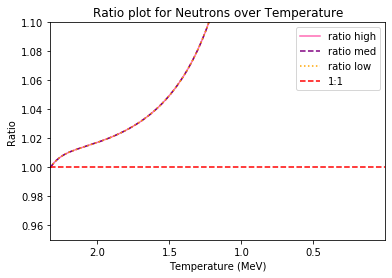

In [56]:
plt.figure()
#plt.subplot(123)
plt.plot(temperature_str_high, ratio_n_high, color = 'hotpink', label = 'ratio high')
plt.plot(temperature_str_med, ratio_n_med, color = 'purple', label = 'ratio med', linestyle = '--')
plt.plot(temperature_str_low, ratio_n_low, color = 'orange', label = 'ratio low', linestyle = ':')
plt.xlabel('Temperature (MeV)')
plt.ylabel('Ratio')
plt.title('Ratio plot for Neutrons over Temperature')
plt.ylim(0.95, 1.1)
plt.axhline(y = 1, color = 'r', linestyle = 'dashed', label = '1:1') 
plt.xlim(max(temperature_str_med), min(temperature_str_med))
#plt.xlim(1, 1.2)
plt.legend()
plt.show()

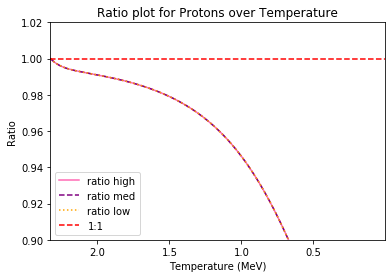

In [57]:
plt.figure()
#plt.subplot(123)
plt.plot(temperature_str_high, ratio_p_high, color = 'hotpink', label = 'ratio high')
plt.plot(temperature_str_med, ratio_p_med, color = 'purple', label = 'ratio med', linestyle = '--')
plt.plot(temperature_str_low, ratio_p_low, color = 'orange', label = 'ratio low', linestyle = ':')
plt.xlabel('Temperature (MeV)')
plt.ylabel('Ratio')
plt.title('Ratio plot for Protons over Temperature')
plt.ylim(0.9, 1.02)
plt.axhline(y = 1, color = 'r', linestyle = 'dashed', label = '1:1') 
plt.xlim(max(temperature_str_med), min(temperature_str_med))
#plt.xlim(10e-1, 10e-4)
#plt.xlim(1, 1.2)
plt.legend()
plt.show()

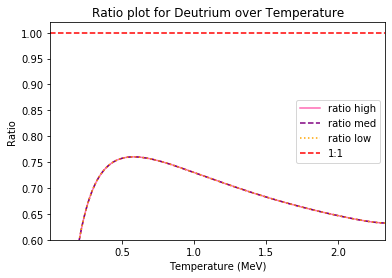

In [58]:
plt.figure()
#plt.subplot(123)
plt.plot(temperature_str_high, ratio_2H_high, color = 'hotpink', label = 'ratio high')
plt.plot(temperature_str_med, ratio_2H_med, color = 'purple', label = 'ratio med', linestyle = '--')
plt.plot(temperature_str_low, ratio_2H_low, color = 'orange', label = 'ratio low', linestyle = ':')
plt.xlabel('Temperature (MeV)')
plt.ylabel('Ratio')
plt.title('Ratio plot for Deutrium over Temperature')
plt.ylim(0.6, 1.02)
plt.axhline(y = 1, color = 'r', linestyle = 'dashed', label = '1:1') 
plt.xlim(min(temperature_str_med), max(temperature_str_med))
#plt.xlim(1, 1.2)
plt.legend()
plt.show()

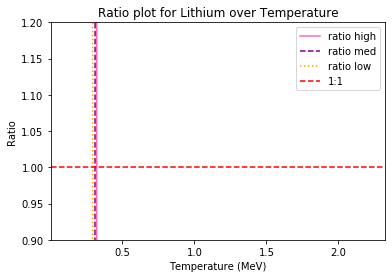

In [59]:
plt.figure()
#plt.subplot(123)
plt.plot(temperature_str_high, ratio_7Li_high, color = 'hotpink', label = 'ratio high')
plt.plot(temperature_str_med, ratio_7Li_med, color = 'purple', label = 'ratio med', linestyle = '--')
plt.plot(temperature_str_low, ratio_7Li_low, color = 'orange', label = 'ratio low', linestyle = ':')
plt.xlabel('Temperature (MeV)')
plt.ylabel('Ratio')
plt.title('Ratio plot for Lithium over Temperature')
plt.ylim(0.9, 1.2)
plt.axhline(y = 1, color = 'r', linestyle = 'dashed', label = '1:1') 
plt.xlim(min(temperature_str_med), max(temperature_str_med))
#plt.xlim(1, 2)
plt.legend()
plt.show()

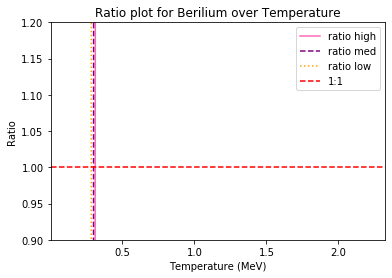

In [60]:
plt.figure()
#plt.subplot(123)
plt.plot(temperature_str_high, ratio_Be7_high, color = 'hotpink', label = 'ratio high')
plt.plot(temperature_str_med, ratio_Be7_med, color = 'purple', label = 'ratio med', linestyle = '--')
plt.plot(temperature_str_low, ratio_Be7_low, color = 'orange', label = 'ratio low', linestyle = ':')
plt.xlabel('Temperature (MeV)')
plt.ylabel('Ratio')
plt.title('Ratio plot for Berilium over Temperature')
plt.ylim(0.9, 1.2)
plt.axhline(y = 1, color = 'r', linestyle = 'dashed', label = '1:1') 
plt.xlim(min(temperature_str_med), max(temperature_str_med))
#plt.xlim(1, 1.2)
plt.legend()
plt.show()

In [61]:
#this was check to see that the ratios between high, med, and low temps were different 

#for i in range(len(temperature_str_med)):
    #diff = ratio_npt_low[i]-ratio_npt_med[i]
   # diff = temperature_str_low[i]-temperature_str_med[i]
    
    #if diff != 0:
        #print(diff)

## Replicate Cosmology I graphs and look at mass fractions over time (temperature)

In [62]:
a = 0

y_n_h = np.zeros(len(Y_n_str_high))
y_2h_h = np.zeros(len(Y_2H_str_high))
y_50_2h_h = np.zeros(len(Y_2H_str_high))
y_4he_h = np.zeros(len(Y_4He_str_high))

y_n_m = np.zeros(len(Y_n_str_med))
y_2h_m = np.zeros(len(Y_2H_str_med))
y_50_2h_m = np.zeros(len(Y_2H_str_med))
y_4he_m = np.zeros(len(Y_4He_str_med))

for i, j, k, l, m , n in zip(Y_n_str_high, Y_2H_str_high, Y_4He_str_high, Y_n_str_med, Y_2H_str_med, Y_4He_str_med):
    y_n_h[a] = 2*i #number fraction grouped together to show amount needed to make 4He
    y_2h_h[a] = 2*j    
    y_50_2h_h[a] = 2*50*j
    y_4he_h[a] = 4*k #number fraction to mass fraction 
    y_n_m[a] = 2*l #number fraction grouped together to show amount needed to make 4He
    y_2h_m[a] = 2*m    
    y_50_2h_m[a] = 2*50*m
    y_4he_m[a] = 4*n #number fraction to mass fraction 
    a += 1

In [63]:
def CompareHighMedMassFrac():   
    plt.figure()
    plt.plot(temperature_str_high, y_2h_h, color = 'purple', linestyle  = ':', label = '2H')
    plt.plot(temperature_str_high, y_n_h, color = 'rebeccapurple', label = '2 x n')
    plt.plot(temperature_str_high, y_50_2h_h, color = 'mediumorchid', label = '50 x 2H')
    plt.plot(temperature_str_high, y_4he_h, color  = 'darkmagenta', label = '4He')
    plt.plot(temperature_str_med, y_2h_m, color = 'teal', linestyle  = ':', label = '2H')
    plt.plot(temperature_str_med, y_n_m, color = 'cyan', label = '2 x n')
    plt.plot(temperature_str_med, y_50_2h_m, color = 'aquamarine', label = '50 x 2H')
    plt.plot(temperature_str_med, y_4he_m, color  = 'mediumseagreen', label = '4He')
    plt.xlim(100*10**-3, 60*10**-3) # original graph was in keV from 100 to 60
    plt.ylim(0, 0.31)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance')
    plt.title('Comparing neutron to helium mass fractions')
    plt.legend()
    

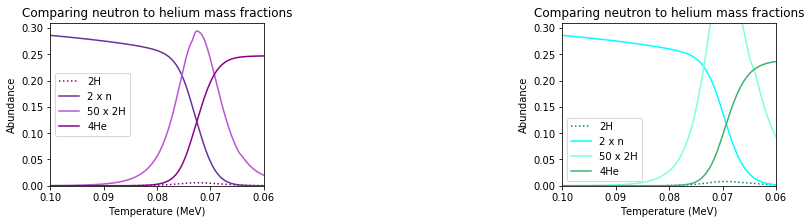

In [64]:
plt.figure(figsize=(13,3))
plt.subplot(131)
plt.plot(temperature_str_high, y_2h_h, color = 'purple', linestyle  = ':', label = '2H')
plt.plot(temperature_str_high, y_n_h, color = 'rebeccapurple', label = '2 x n')
plt.plot(temperature_str_high, y_50_2h_h, color = 'mediumorchid', label = '50 x 2H')
plt.plot(temperature_str_high, y_4he_h, color  = 'darkmagenta', label = '4He')
plt.xlim(100*10**-3, 60*10**-3) # original graph was in keV from 100 to 60
plt.ylim(0, 0.31)
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance')
plt.title('Comparing neutron to helium mass fractions')
plt.legend()

plt.subplot(133)
plt.plot(temperature_str_med, y_2h_m, color = 'teal', linestyle  = ':', label = '2H')
plt.plot(temperature_str_med, y_n_m, color = 'cyan', label = '2 x n')
plt.plot(temperature_str_med, y_50_2h_m, color = 'aquamarine', label = '50 x 2H')
plt.plot(temperature_str_med, y_4he_m, color  = 'mediumseagreen', label = '4He')
plt.xlim(100*10**-3, 60*10**-3) # original graph was in keV from 100 to 60
plt.ylim(0, 0.31)
plt.xlabel('Temperature (MeV)')
plt.ylabel('Abundance')
plt.title('Comparing neutron to helium mass fractions')
plt.legend()
plt.show()

**For plots - purples : $\eta$ = $6.1x10^{-10}$ , greens : $\eta$ = $3x10^{-10}$**

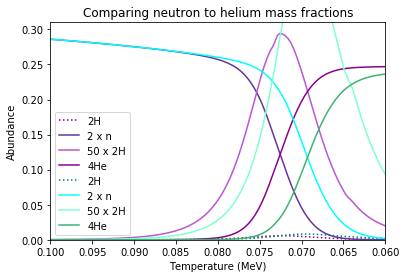

In [65]:
CompareHighMedMassFrac()
plt.show()

As $\eta$ decreases, neutron production declines later meaning there's less neutrons when it decreases, and deutrium production occurs later, then there's less helium overall because there's less neutrons when deuterium starts forming 